## Data Type
### String

#### 1. %-formatting

In [81]:
msg = 'disk failure'
x = 5.5
print('error: %s' % msg)
# 5.2f stands for float with hold 5 digit width and round to the 2nd digit
print('%5.2f is a number of %s' % (x, msg))

error: disk failure
 5.50 is a number of disk failure


#### 2. str.format()

In [82]:
# very verbose
x = 5.5
print('The value is {x}.'.format(x=x))
print('The value is {}.'.format(x))

# compared with f string
print('f-string:')
print(f'The value is {x}.')

# other examples
print('---- other examples')
person = {'name': 'Eric', 'age': 74}
print("Hello, {name}. You are {age}.".format(name=person['name'], age=person['age']))
print("Hello, {name}. You are {age}.".format(**person))

The value is 5.5.
The value is 5.5.
f-string:
The value is 5.5.
---- other examples
Hello, Eric. You are 74.
Hello, Eric. You are 74.


#### 3. f-string (Literal String Interpolation)

- f-string are faster than both %-formatting and str.format()
- evaluate at runtime rather than constant value

In [83]:
# https://www.python.org/dev/peps/pep-0498/
# https://docs.python.org/3/reference/lexical_analysis.html#f-strings
import datetime
# specify format, this is also availble in 
v = 1234
print(f'input={v:#06x}')

# specify date format
date = datetime.date(1992, 5, 27)
print(f'{date} was a {date:%A}')

# Arbitrary Expressions
print('-- Arbitrary Expressions -- ')
print('- evaluate an equation: ')
print(f'{2 * 37}')

print('- evaluate a function:')
name = 'Charles Zhang'
print(f'{name.lower()} is funny.')

print('- even a class:')
class Comedian:
    def __init__(self, first_name, last_name, age):
        self.first_name = first_name
        self.last_name = last_name
        self.age = age

    def __str__(self):
        return f"{self.first_name} {self.last_name} is {self.age}."

    def __repr__(self):
        return f"{self.first_name} {self.last_name} is {self.age}. Surprise!"

n_c = Comedian("Eric", "Idle", "74")
print(f'{n_c}')
print(f'{n_c!r}')

# Multiple lines
name = "Eric"
profession = "comedian"
affiliation = "Monty Python"
print('-Multiple Line f-strings:')
message = (
     f"Hi {name}. "
     f"You are a {profession}. "
     f"You were in {affiliation}."
)
print(message)

## Or
message = f"Hi {name}. " \
          f"You are a {profession}. " \
          f"You were in {affiliation}."
print(message)

message = f"""
     Hi {name}. 
     You are a {profession}. 
     You were in {affiliation}.
"""
print(message)

input=0x04d2
1992-05-27 was a Wednesday
-- Arbitrary Expressions -- 
- evaluate an equation: 
74
- evaluate a function:
charles zhang is funny.
- even a class:
Eric Idle is 74.
Eric Idle is 74. Surprise!
-Multiple Line f-strings:
Hi Eric. You are a comedian. You were in Monty Python.
Hi Eric. You are a comedian. You were in Monty Python.

     Hi Eric. 
     You are a comedian. 
     You were in Monty Python.



In [91]:
# others
# 1. quotation marks
print('1. quotation marks')
name = 'Eric'
age = '16'
print(f"{'Eric Idle'}")
print(f"The \"comedian\" is {name}, aged {age}.")

# 2. Dictionaries
print('2. Dictionaries')
info = {'name': 'Charles', 'age': 26}
print(f"The name is {info['name']}, aged {info['age']}.")

# 3. Braces
print('3. Braces')
print(f"{{ {74+1} }}")

# 4. Backslashes
print('4. Backslashes')
# you can’t use backslashes to escape in the expression part of an f-string

# no inline comment



1. quotation marks
Eric Idle
The "comedian" is Eric, aged 16.
The name is Charles, aged 26.
{ 75 }


#### 4. Template Strings (Standard Library)
safer choice if you’re handling format strings generated from user input

In [94]:
from string import Template
t = Template('Hey, $name!')
name = 'Charles'
t.substitute(name=name)

'Hey, Charles!'

## DataFrame

In [452]:
import sys
sys.path.append(r'C:\Users\zhangy\OneDrive - Occidental Petroleum Corporation\My\_script')
from OFO_scripts.stellnet_parse import parse_obs, parse_ui, parse_true
from OFO_scripts import stellnet_plot as st_plot
from OFO_scripts import utility as utl
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import pandas as pd
plt.style.use('seaborn-whitegrid')

In [357]:
import imp
imp.reload(st_plot)

<module 'OFO_scripts.stellnet_plot' from 'C:\\Users\\zhangy\\OneDrive - Occidental Petroleum Corporation\\My\\_script\\OFO_scripts\\stellnet_plot.py'>

In [531]:
dir = r'C:\Users\zhangy\OneDrive - Occidental Petroleum Corporation\Cases\HM_cases\9polygon_322_visc7_zhangy\output'
assimilation = 1
# [OIL_PROD    WATER_PROD        LIQUID_PROD     WATER_INJ]
mismatch_list = []

nWells, start_date, day_final, day_hm = \
    parse_ui(os.path.join(dir, '../input/UI.txt'), ['Num_Wells', 'Start_Date', 'T_FINAL_PRED', 'T_FINAL_HM'])
day_2yrs = day_final - 365*2

# parse true
df_true = parse_true(dir, nWells, assimilation)
df_true['WATER_PROD'] = df_true['WATER'].map(lambda x: x if x>=0 else 0)
df_true['WATER_INJ'] = df_true['WATER'].map(lambda x: -x if x<0 else 0)
df_true['LIQUID_PROD'] = df_true['WATER_PROD'] + df_true['OIL_PROD']
df_true['DATE'] = df_true['DAY'].map(lambda x: start_date + datetime.timedelta(days=x))
df_true_sum = df_true[['DAY', 'DATE', 'OIL_PROD', 'WATER_PROD', 'LIQUID_PROD', 'WATER_INJ']].groupby(['DAY', 'DATE'], as_index=False).sum()
df_true_sum['OIL_CUT'] = df_true_sum['OIL_PROD']/df_true_sum['LIQUID_PROD']

# parse and format simulation data
df_obs = parse_obs(dir, nWells, assimilation)
df_obs['WATER_PROD'] = df_obs['WATER'].map(lambda x: x if x>=0 else 0)
df_obs['WATER_INJ'] = df_obs['WATER'].map(lambda x: -x if x<0 else 0)
df_obs['LIQUID_PROD'] = df_obs['WATER_PROD'] + df_obs['OIL_PROD']
df_obs['DATE'] = df_obs['DAY'].map(lambda x: start_date + datetime.timedelta(days=x))
df_obs_sum = df_obs[['ENS', 'DAY','DATE', 'OIL_PROD', 'WATER_PROD', 'LIQUID_PROD', 'WATER_INJ']].groupby(['ENS', 'DAY', 'DATE'], as_index=False).sum()
df_obs_sum['OIL_CUT'] = df_obs_sum['OIL_PROD']/df_obs_sum['LIQUID_PROD']

In [530]:
def HM_field_st(dir, df_true_sum, df_obs_sum, day_hm):
    day_mismatch = day_hm
    title_app = ''
    if day_hm == df_obs_sum.DAY.max():
        day_mismatch = day_hm - 365*2
        title_app = ' (recent 2 yrs)'
    # field hist
    df_obs_mismatch = df_obs_sum[df_obs_sum['DAY'] > day_mismatch]
    df_true_mismatch = df_true_sum[df_true_sum['DAY'] > day_mismatch]
    df_mismatch = df_obs_mismatch[['ENS', 'OIL_PROD', 'WATER_PROD', 'LIQUID_PROD', 'WATER_INJ']].groupby(['ENS']).agg(lambda x: utl.compute_mismatch(x, df_true_mismatch))
    df_mismatch.rename(columns={'OIL_PROD':'OIL_PROD Mismatch', 'WATER_PROD':'WATER_PROD Mismatch',
                          'LIQUID_PROD':'LIQUID_PROD Mismatch', 'WATER_INJ': 'WATER_INJ Mismatch'}, inplace=True)
    # plot ensemble response
    
    fig_field = st_plot.plot_blind_test_ens2(df_true_sum, df_obs_sum, day_hm)
    plt.suptitle('Ensemble Well Response', fontsize=16)
    fig_field.savefig(os.path.join(dir, 'HM_ST_field.png'), facecolor=fig.get_facecolor())
    
    # plot field hist
    fig_field_hist = st_plot.hist_by_col(df_mismatch)
    plt.suptitle(f'Field Rate Mismatch(RMSE) Distribution{title_app}', fontsize=16)
    fig_field_hist.savefig(os.path.join(dir, 'HM_ST_field_mistmatch_hist.png'), facecolor=fig.get_facecolor())

def HM_well_st(dir, df_true, df_obs, day_hm):
    # prepare data, extrac the period that compute mismatch
    day_mismatch = day_hm
    title_app = ''
    if day_hm == df_obs_sum.DAY.max():
        day_mismatch = day_hm - 365*2
        title_app = ' (recent 2 yrs)'
    df_obs_mismatch_w = df_obs[df_obs['DAY'] > day_mismatch]
    df_true_mismatch_w = df_true[df_true['DAY'] > day_mismatch]
    
    # output histogram for by well mismatch
    df_mismatch_w = df_obs_mismatch_w[['ENS', 'OIL_PROD', 'WATER_PROD', 'LIQUID_PROD', 'WATER_INJ']].groupby(['ENS']).agg(lambda x: utl.compute_mismatch(x, df_true_mismatch_w))
    df_mismatch_w.rename(columns={'OIL_PROD':'OIL_PROD Mismatch', 'WATER_PROD':'WATER_PROD Mismatch',
                          'LIQUID_PROD':'LIQUID_PROD Mismatch', 'WATER_INJ': 'WATER_INJ Mismatch'}, inplace=True)
    
    fig_well_hist = st_plot.hist_by_col(df_mismatch_w)
    plt.suptitle(f'Well Rate Mismatch(RMSE) Distribution{title_app}', fontsize=16)
    fig_well_hist.savefig(os.path.join(dir, 'HM_ST_well_mistmatch_hist.png'), facecolor=fig.get_facecolor())
    
    # output well rank - prepare data
    group = df_obs_mismatch_w[['WELL', 'ENS', 'OIL_PROD', 'WATER_PROD']].groupby(['WELL','ENS'])
    ls_w_ens_mismatch = []
    for idxs, g in group:
        well = idxs[0]
        ens = idxs[1]
        df_true_tmp = df_true_mismatch_w[df_true_mismatch_w.WELL==well]
        agg_values = g[['OIL_PROD', 'WATER_PROD']].agg(lambda x: utl.compute_mismatch(x, df_true_tmp))
        ls_w_ens_mismatch.append({'ENS': ens, 'WELL': well, 
                                  'OIL_PROD_MISMATCH': agg_values['OIL_PROD'], 
                                  'WATER_PROD_MISMATCH': agg_values['WATER_PROD']})
    
    # output well rank 
    df_w_mismatch = pd.DataFrame(ls_w_ens_mismatch, columns=['WELL', 'ENS', 'OIL_PROD_MISMATCH', 'WATER_PROD_MISMATCH'])
    df_w_mismatch = df_w_mismatch.groupby(['WELL'])[['OIL_PROD_MISMATCH', 'WATER_PROD_MISMATCH']].agg([np.mean, np.std])
    df_w_mismatch = df_w_mismatch.sort_values(by = [('OIL_PROD_MISMATCH', 'mean')])
    df_w_mismatch = df_w_mismatch[df_w_mismatch[('OIL_PROD_MISMATCH', 'mean')] > 0]
    df_true_count = df_true_mismatch_w.groupby(['WELL'])['OIL_PROD', 'WATER_PROD'].agg(lambda x: x.astype(bool).sum(axis=0) )
    df_true_count.rename(columns={'OIL_PROD':'OIL_DATA_COUNT', 'WATER_PROD': 'WATER_DATA_COUNT'})
    df_w_mismatch = df_w_mismatch.join(df_true_count, how='left')
    df_w_mismatch.to_excel(os.path.join(dir, 'HM_ST_well_mistmatch_rank.xlsx'))

In [534]:
# output well rank - prepare data
day_mismatch = day_hm
title_app = ''
if day_hm == df_obs_sum.DAY.max():
    day_mismatch = day_hm - 365*2
    title_app = ' (recent 2 yrs)'

df_obs_mismatch_w = df_obs[df_obs['DAY'] > day_mismatch]
df_true_mismatch_w = df_true[df_true['DAY'] > day_mismatch]

group = df_obs_mismatch_w[['WELL', 'ENS', 'OIL_PROD', 'WATER_PROD']].groupby(['WELL','ENS'])
ls_w_ens_mismatch = []
for idxs, g in group:
    well = idxs[0]
    ens = idxs[1]
    df_true_tmp = df_true_mismatch_w[df_true_mismatch_w.WELL==well]
    agg_values = g[['OIL_PROD', 'WATER_PROD']].agg(lambda x: utl.compute_mismatch(x, df_true_tmp))
    ls_w_ens_mismatch.append({'ENS': ens, 'WELL': well, 
                              'OIL_PROD_MISMATCH': agg_values['OIL_PROD'], 
                              'WATER_PROD_MISMATCH': agg_values['WATER_PROD']})

# output well rank 
df_w_mismatch = pd.DataFrame(ls_w_ens_mismatch, columns=['WELL', 'ENS', 'OIL_PROD_MISMATCH', 'WATER_PROD_MISMATCH'])
df_w_mismatch = df_w_mismatch.groupby(['WELL'])[['OIL_PROD_MISMATCH', 'WATER_PROD_MISMATCH']].agg([np.mean, np.std])
df_w_mismatch = df_w_mismatch.sort_values(by = [('OIL_PROD_MISMATCH', 'mean')])
df_w_mismatch = df_w_mismatch[df_w_mismatch[('OIL_PROD_MISMATCH', 'mean')] > 0]
df_true_count = df_true_mismatch_w.groupby(['WELL'])['OIL_PROD', 'WATER_PROD'].agg(lambda x: x.astype(bool).sum(axis=0) )
df_true_count.rename(columns={'OIL_PROD':'OIL_DATA_COUNT', 'WATER_PROD': 'WATER_DATA_COUNT'})
df_w_mismatch = df_w_mismatch.join(df_true_count, how='left')
df_w_mismatch.to_excel(os.path.join(dir, 'HM_ST_well_mistmatch_rank.xlsx'))

C:\Users\zhangy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


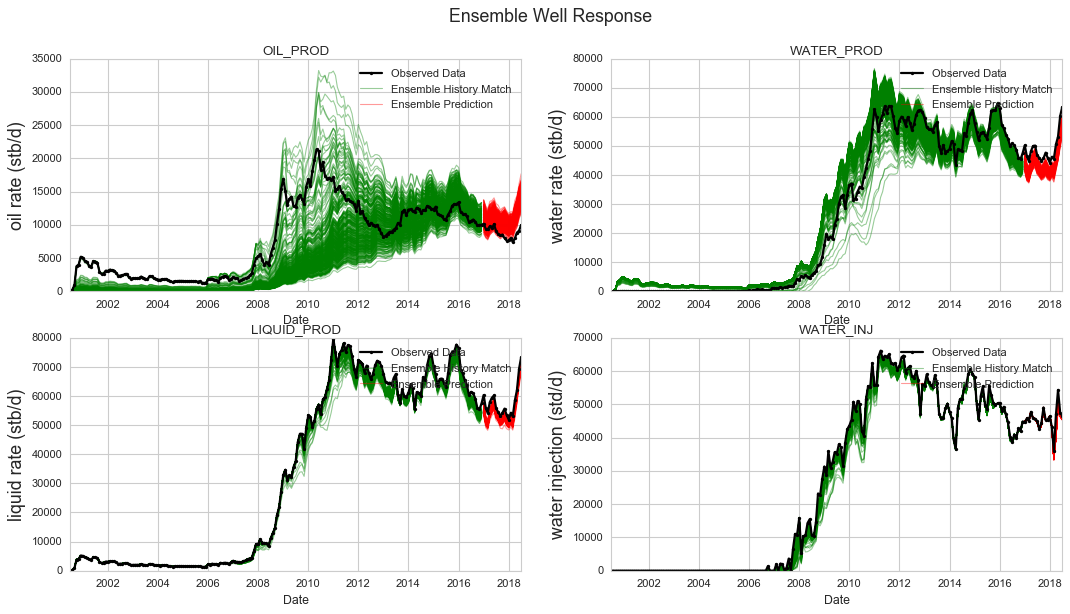

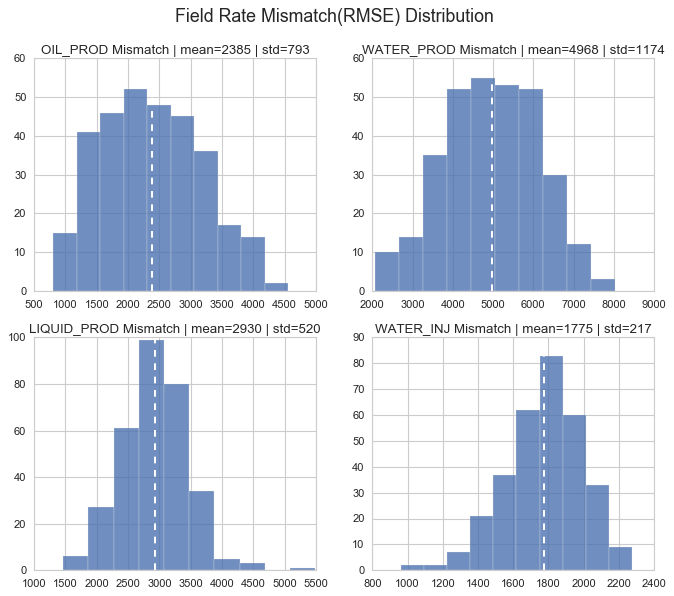

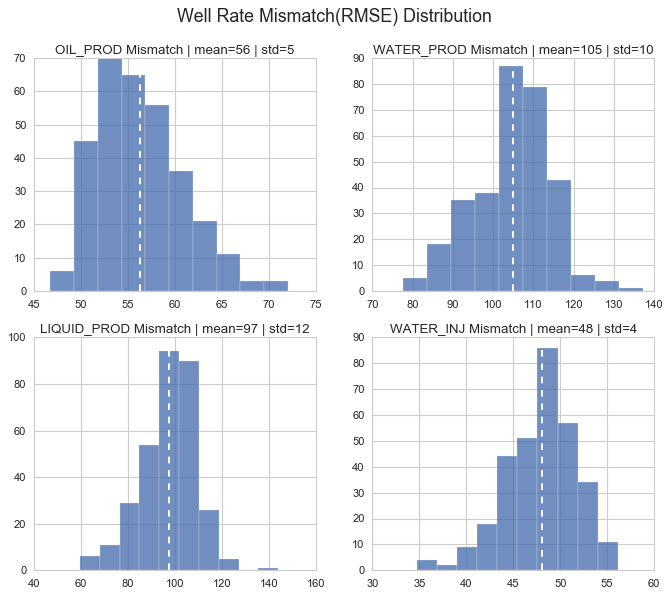

In [400]:
HM_field_st(dir, df_true_sum, df_obs_sum, day_hm)
HM_well_st(dir, df_true, df_obs, day_hm)

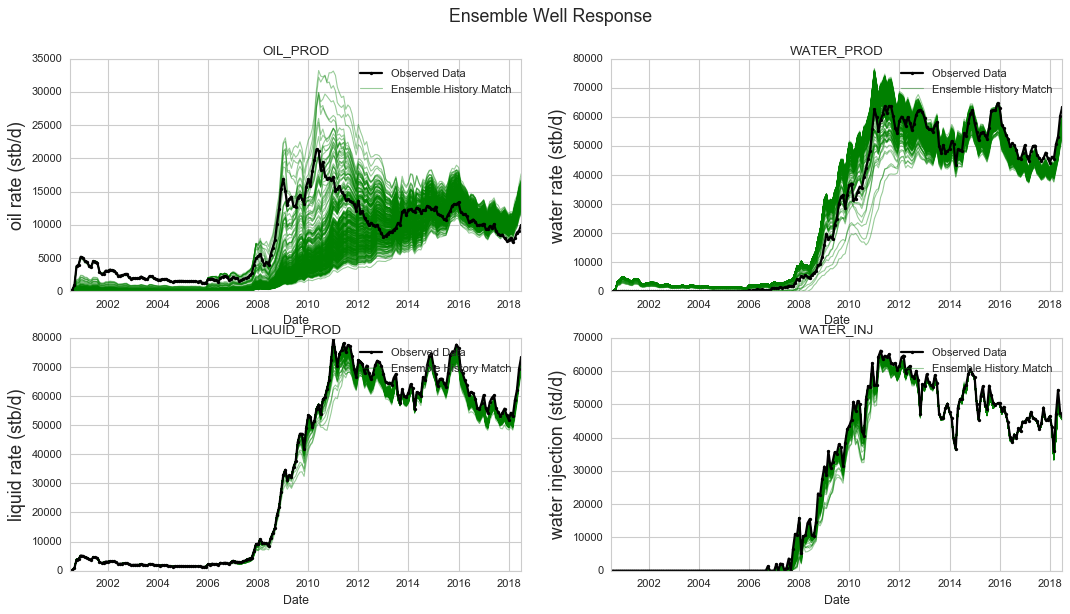

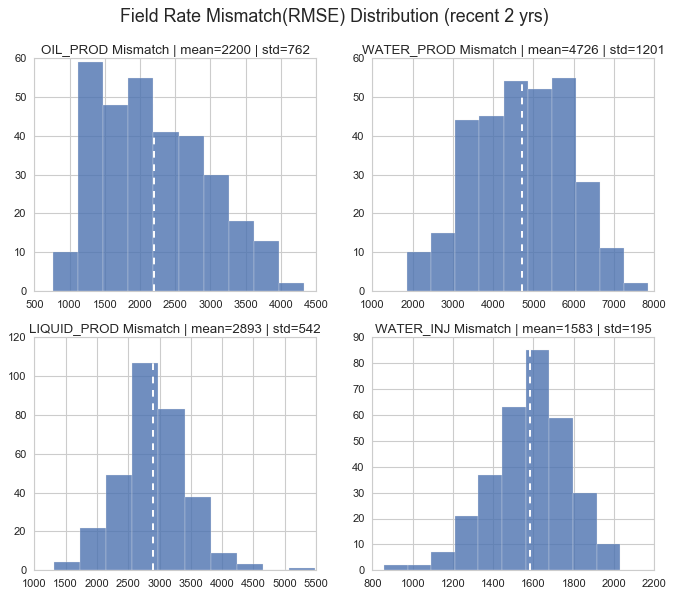

In [401]:
HM_field_st(dir, df_true_sum, df_obs_sum, df_obs_sum.DAY.max())